# Calculation of coherent elastic neutrino-electron scattering E$\nu$ES

In this notebook we outline how to generate E$\nu$ES rate. First we show how to do it for the SM and then for non-zero NSI parameters. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from snudd import config
from snudd.targets import Electron      # the elctron target class object
from snudd.binding import binding_xe    # dataclass of binding energy data for xenon
from snudd.rrpa    import rrpa_scaling  # ad-hoc rrpa scaling for bound electron
from snudd.models  import GeneralNSI    # Generic NSI model
from snudd.targets import Nucleus       # Still need a nucleus to be declared

Setting up the target of the DD experiment:

In [3]:
Xe_nucleus = Nucleus(54, 132, mass=131.9041535 * config.u) # only do one isotope for this example 

## SM E$\nu$ES scattering rate 

 We generate an instance of the SM (in terms of zero NSI) and compute and plot the theoretical (i.e. without including any experimental effects) E$\nu$ES rate in Xe.

In [4]:
SM_matrix = np.array([[0, 0, 0],
                      [0, 0, 0],
                      [0, 0, 0]])

SM_eta = 0
SM_phi = 0

sm_model = GeneralNSI(SM_matrix, SM_eta, SM_phi)

Update the nucleus object with the NSI model, i.e. the SM in this case.

In [5]:
Xe_electron = Electron(Xe_nucleus, binding_xe, rrpa_scaling) 
Xe_electron.update_model(sm_model)
Xe_electron.prepare_density()

In [6]:
E_Rs = np.logspace(-2, 2, 1000) / 1e6  # Recoil Energy in GeV

In [7]:
sm_spec = Xe_electron.spectrum(E_Rs) 

(0.5, 5.0)

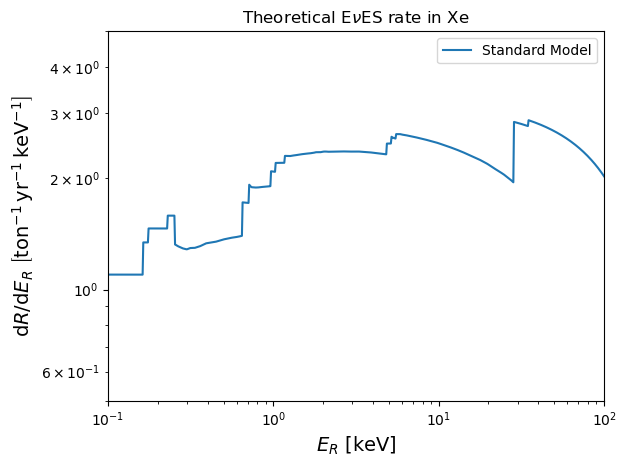

In [14]:
plt.loglog(E_Rs*1e6, abs(sm_spec), label="Standard Model")

plt.legend()
plt.title(r"Theoretical E$\nu$ES rate in Xe")
plt.ylabel(r'${\rm d}R/{\rm d}E_R\,\,\left[{\rm ton}^{-1}\,{\rm yr}^{-1}\,{\rm keV}^{-1}\right]$', size=14)
plt.xlabel(r'$E_{R}\,\,\left[{\rm keV}\right]$', size=14)

plt.xlim(xmin=1e-1, xmax=1e2)
plt.ylim(ymax=5e0, ymin=5e-1)

## NSI E$\nu$ES scattering rate 

Now do the same for a non-zero NSI $\varepsilon_{e\mu}=0.1$ coupling with electrons ($\varphi=-\pi/2$).

In [9]:
NSI_matrix = np.array([[0.0, 0.1, 0.0],
                       [0.1, 0.0, 0.0],
                       [0.0, 0.0, 0.0]])

NSI_eta = 0.0
NSI_phi = -np.pi/2

NSI_model = GeneralNSI(NSI_matrix, NSI_eta, NSI_phi)

Update the nucleus object with the new NSI model and compute the new spectrum.

In [10]:
Xe_electron = Electron(Xe_nucleus, binding_xe, rrpa_scaling)
Xe_electron.update_model(NSI_model)
Xe_electron.prepare_density()

In [11]:
NSI_spec = Xe_electron.spectrum(E_Rs)

Plotting the SM and NSI spectra.

(0.5, 5.0)

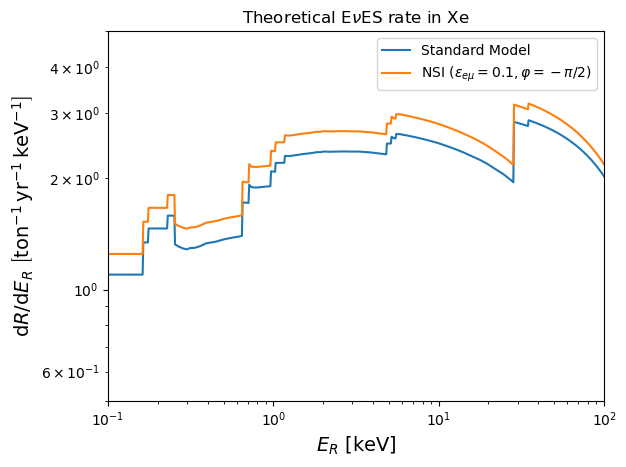

In [12]:
plt.loglog(E_Rs*1e6, abs(sm_spec), label="Standard Model")
plt.loglog(E_Rs*1e6, abs(NSI_spec), label=r"NSI ($\varepsilon_{e\mu}=0.1, \varphi=-\pi/2$)")

plt.legend()
plt.title(r"Theoretical E$\nu$ES rate in Xe")
plt.ylabel(r'${\rm d}R/{\rm d}E_R\,\,\left[{\rm ton}^{-1}\,{\rm yr}^{-1}\,{\rm keV}^{-1}\right]$', size=14)
plt.xlabel(r'$E_{R}\,\,\left[{\rm keV}\right]$', size=14)

plt.xlim(xmin=1e-1, xmax=1e2)
plt.ylim(ymax=5e0, ymin=5e-1)